## Time Complexity




In [1]:
import numpy as np
import timeit
import time
import random

from math import factorial
import matplotlib.pyplot as plt

In [ ]:
random.seed(42)

In [2]:
# Decorator for time
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

def timer(func, *args):
    wrapped = wrapper(func, *args)
    time = timeit.timeit(wrapped,number=10000)
    return("Time of execution is {} ms".format(time))

### O(1) Constant

In [3]:


# Adds 2 numbers
def O1_add(n1, n2):
    return (n1 + n2)

In [4]:
for n in range(1,6):
    print(n,",",n + random.randint(1,int(1e10)))
    print(timer(O1_add, int(n), int(n) + random.randint(1,int(1e10))))
    print()

1 , 2746317215
Time of execution is 0.0010974160395562649 ms

2 , 1181241946
Time of execution is 0.0010502079967409372 ms

3 , 3163119789
Time of execution is 0.0010492500150576234 ms

4 , 1812140446
Time of execution is 0.0010478339390829206 ms

5 , 939042961
Time of execution is 0.0011107500176876783 ms



In [5]:
# Checks whether a number is even or odd by checking last digit of binary representation
def O1_odd_check(num):
    is_odd = False
    if num & 1 == 1:
        is_odd = True
    return is_odd

In [6]:
check_lst = [1,5,8,82,101]
for num in check_lst:
    print(num,"::",O1_odd_check(num),"::",timer(O1_odd_check, num))

1 :: True :: Time of execution is 0.0012089170049875975 ms
5 :: True :: Time of execution is 0.0012171249836683273 ms
8 :: False :: Time of execution is 0.001239042030647397 ms
82 :: False :: Time of execution is 0.001421040971763432 ms
101 :: True :: Time of execution is 0.0012135420693084598 ms


## O(n) Linear

In [7]:
# Finds an item in an unsorted list
def On_simple_search(lst,number):
    is_found = False
    for num in lst:
        if num == number:
            is_found = True
    return is_found

In [8]:
lst1 = range(5)
lst2 = range(500)
lst3 = range(50000)

num1 = 2
num2 = -50
num3 = 4000
print(On_simple_search(lst1,num1),"::",timer(On_simple_search,lst1,num1))
print(On_simple_search(lst2,num2),"::",timer(On_simple_search,lst2,num2))
print(On_simple_search(lst3,num3),"::",timer(On_simple_search,lst3,num3))

True :: Time of execution is 0.002011624979786575 ms
False :: Time of execution is 0.08363870903849602 ms
True :: Time of execution is 10.002091791946441 ms


## O(log N)

In [9]:
def Ologn_binary_search(list,number):
    first = 0
    last = len(list) - 1
    is_found = False
    while first <= last and not is_found:
        mid = (first + last)//2
        if list[mid] == number:
            is_found = True
        else:
            if number < mid:
                last = mid - 1
            else:
                first = mid + 1
    return is_found

In [10]:
lst1 = range(5)
lst2 = range(500)
lst3 = range(50000)

num1 = 2
num2 = -50
num3 = 4000
print(Ologn_binary_search(lst1,num1),"::",timer(Ologn_binary_search,lst1,num1),"::","log value = {}".format(np.log2(len(lst1))))
print(Ologn_binary_search(lst2,num2),"::",timer(Ologn_binary_search,lst2,num2),"::","log value = {}".format(np.log2(len(lst2))))
print(Ologn_binary_search(lst3,num3),"::",timer(Ologn_binary_search,lst3,num3),"::","log value = {}".format(np.log2(len(lst3))))

True :: Time of execution is 0.0021952500101178885 ms :: log value = 2.321928094887362
False :: Time of execution is 0.010061749955639243 ms :: log value = 8.965784284662087
True :: Time of execution is 0.021316542057320476 ms :: log value = 15.609640474436812


## O(n log n)

In [11]:
def Onlogn_merge_sort(sequence):
    if len(sequence) < 2:
        return sequence
    
    m = len(sequence) // 2
    return Onlogn_merge(Onlogn_merge_sort(sequence[:m]), Onlogn_merge_sort(sequence[m:]))


def Onlogn_merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]

    return result

In [12]:
array = [4, 2, 3, 8, 8, 43, 6,1, 0]
ar = Onlogn_merge_sort(array)
print (" ".join(str(x) for x in ar))

0 1 2 3 4 6 8 8 43


In [13]:
lst1 = [4,2,3,8,8,43,6,1,0,83]
lst2 = []
for i in range(100):
    lst2.append(random.randint(0,i))

In [14]:
print("Sorted lst1:: ",Onlogn_merge_sort(lst1))
print(timer(Onlogn_merge_sort,lst1)," :: nlogn ~= {}".format(len(lst1)*np.log2(len(lst1))))

print("Sorted lst2:: ",Onlogn_merge_sort(lst2))
print(timer(Onlogn_merge_sort,lst2)," :: nlogn ~= {}".format(len(lst2)*np.log2(len(lst2))))

Sorted lst1::  [0, 1, 2, 3, 4, 6, 8, 8, 43, 83]
Time of execution is 0.0787646669195965 ms  :: nlogn ~= 33.219280948873624
Sorted lst2::  [0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 8, 8, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 14, 14, 14, 15, 17, 17, 17, 17, 17, 18, 18, 18, 19, 20, 22, 23, 23, 23, 23, 24, 27, 27, 28, 28, 29, 29, 29, 31, 33, 33, 34, 34, 34, 38, 40, 40, 40, 40, 41, 41, 42, 43, 44, 46, 46, 48, 50, 51, 51, 54, 58, 59, 63, 63, 65, 68, 71, 72, 74, 74, 82]
Time of execution is 1.1213073330000043 ms  :: nlogn ~= 664.3856189774724


## O(n^2)

In [15]:
def On2_bubble_sort(lst):
    for i in range(len(lst)-1):
        for j in range(len(lst)-1-i):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
    return lst

In [16]:
lst1 = [4,2,3,8,8,43,6,1,0,83]
lst2 = []
for i in range(100):
    lst2.append(random.randint(0,i))

In [17]:
print("Sorted lst1:: ",On2_bubble_sort(lst1))
print(timer(On2_bubble_sort,lst1)," :: n^2 ~= {}".format(len(lst1)**2))

print("Sorted lst2:: ",On2_bubble_sort(lst2))
print(timer(On2_bubble_sort,lst2)," :: n^2 ~= {}".format(len(lst2)**2))

Sorted lst1::  [0, 1, 2, 3, 4, 6, 8, 8, 43, 83]
Time of execution is 0.03393141599372029 ms  :: n^2 ~= 100
Sorted lst2::  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 11, 12, 13, 14, 15, 15, 15, 16, 16, 16, 17, 19, 19, 20, 21, 23, 23, 23, 23, 24, 25, 27, 28, 28, 29, 29, 31, 31, 31, 32, 32, 33, 33, 34, 34, 36, 38, 39, 42, 43, 46, 47, 48, 49, 51, 52, 54, 56, 57, 60, 66, 67, 69, 70, 75, 75, 80, 90]
Time of execution is 2.1744207920273766 ms  :: n^2 ~= 10000


## O(n!)

In [18]:
def onfac_perm(a, k=0):
    if k==len(a):
#         print(a) # Commendted out for display purposes
        pass
    else:
        for i in range(k, len(a)):
            a[k],a[i] = a[i],a[k]
            onfac_perm(a, k+1)
            a[k],a[i] = a[i],a[k]

In [19]:
lst1 = [1,2,]
lst2 = [1,2,3,4]
lst3 = [1,2,3,4,5,6]

print("List of {} items :: ".format(len(lst1)), timer(onfac_perm,lst1), " :: factorial {} is {}".format(len(lst1),factorial(len(lst1))))
print("List of {} items :: ".format(len(lst2)), timer(onfac_perm,lst2), " :: factorial {} is {}".format(len(lst2),factorial(len(lst2))))
print("List of {} items :: ".format(len(lst3)), timer(onfac_perm,lst3), " :: factorial {} is {}".format(len(lst3),factorial(len(lst3))))

List of 2 items ::  Time of execution is 0.012124874978326261 ms  :: factorial 2 is 2
List of 4 items ::  Time of execution is 0.16611366695724428 ms  :: factorial 4 is 24
List of 6 items ::  Time of execution is 4.782875957898796 ms  :: factorial 6 is 720


### Graphical view of time complexity

In [20]:
# O(1) Complexity
def constant_complexity(n):
    return n + 1

# O(n) Complexity
def linear_complexity(n):
    sum = 0
    for i in range(n):
        sum += i
    return sum

# O(log n) Complexity - Binary Search as an example
def logarithmic_complexity(arr, target):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] < target:
            low = mid + 1
        elif arr[mid] > target:
            high = mid - 1
        else:
            return mid
    return -1

# O(n^2) Complexity
def quadratic_complexity(n):
    sum = 0
    for i in range(n):
        for j in range(n):
            sum += i + j
    return sum

# O(n!) Complexity - Factorial as an example
def factorial(n):
    # Calculate n! iteratively
    factorial = 1
    for i in range(1, n + 1):
        factorial *= i
    return factorial

# Generate synthetic data
n_values = list(range(1, 1001, 5))  # Adjust the range based on the complexity of the algorithms

# Measure execution times
times = {
    'O(1)': [],
    'O(n)': [],
    'O(log n)': [],
    'O(n^2)': [],
    'O(n!)': [],
}

for n in n_values:
    # O(1)
    start_time = time.time()
    constant_complexity(n)
    times['O(1)'].append(time.time() - start_time)

    # O(n)
    start_time = time.time()
    linear_complexity(n)
    times['O(n)'].append(time.time() - start_time)

    # O(log n)
    arr = sorted(list(range(n)))
    target = arr[-1]  # Ensure the target is in the array
    start_time = time.time()
    logarithmic_complexity(arr, target)
    times['O(log n)'].append(time.time() - start_time)

    # O(n^2)
    start_time = time.time()
    quadratic_complexity(n)
    times['O(n^2)'].append(time.time() - start_time)

    # O(n!)
    if n <= 15:  # Factorial grows very fast, so we limit n to avoid long computation times
        start_time = time.time()
        factorial(n)
        times['O(n!)'].append(time.time() - start_time)
    else:
        times['O(n!)'].append(None)

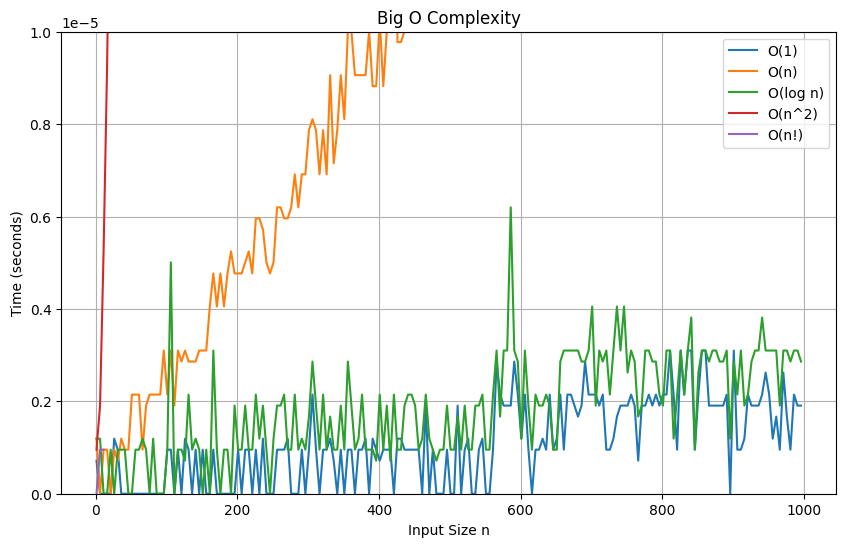

In [21]:
# Plot the results
plt.figure(figsize=(10, 6))
for complexity, t in times.items():
    plt.plot(n_values, t, label=complexity)

plt.xlabel('Input Size n')
plt.ylabel('Time (seconds)')
plt.title('Big O Complexity')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.00001)
plt.show()


<img src="images/BigO.png" alt="" title="Título opcional" width="50%" height="10%"/>

In [26]:
start_time = time.time()
linear_complexity(10**8)
print("Time for O(n) complexity with n=10^8: ", time.time() - start_time)

Time for O(n) complexity with n=10^8:  2.9250471591949463
